In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Description :
 - The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

 - Age of patient at time of operation (numerical)
 - Patient's year of operation (year - 1900, numerical)
 - Number of positive axillary nodes detected (numerical)
 - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [19]:
%matplotlib inline

In [20]:
Hererman_df=pd.read_csv('haberman.csv')

In [21]:
Hererman_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [22]:
Hererman_df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [23]:
Hererman_df.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

In [24]:
#Renaming the actual name to meaning full name
Hererman_df1=Hererman_df.rename(columns={'age': 'Paitence Age', 'year': 'year_of_treatment', 'nodes': 'positive_lymph_nodes','status':'survival_status_after_5_years'})

In [25]:
Hererman_df1.isnull().sum()

Paitence Age                     0
year_of_treatment                0
positive_lymph_nodes             0
survival_status_after_5_years    0
dtype: int64

In [26]:
Hererman_df1['positive_lymph_nodes'].unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28])

In [27]:
Hererman_df1['survival_status_after_5_years'].unique()

array([1, 2])

In [28]:
Hererman_df1['survival_status_after_5_years'].value_counts()

1    225
2     80
Name: survival_status_after_5_years, dtype: int64

In [29]:
Hererman_df1.shape

(305, 4)

In [30]:
Hererman_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Paitence Age                   305 non-null    int64
 1   year_of_treatment              305 non-null    int64
 2   positive_lymph_nodes           305 non-null    int64
 3   survival_status_after_5_years  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [31]:
# As survival_status_after_5_years is integers converting it to catagorical vale 
Hererman_df1['survival_status_after_5_years']=Hererman_df1['survival_status_after_5_years'].map({1:"Y", 2:"N"})

In [32]:
Hererman_df1.head(5)

,Paitence Age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,Y
1,30,62,3,Y
2,30,65,0,Y
3,31,59,2,Y
4,31,65,4,Y


In [33]:
Hererman_df1.describe()

,Paitence Age,year_of_treatment,positive_lymph_nodes
count,305.000000,305.000000,305.000000
mean,52.357377,62.868852,4.032787
std,10.678010,3.242783,7.200528
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.000000,66.000000,4.000000
max,78.000000,69.000000,52.000000


In [34]:
print("No of rows : " + str(Hererman_df1.shape[0]))
print("No of colums : " + str(Hererman_df1.shape[1]))
print("Target Variable Distribution")
print(Hererman_df1.iloc[:,-1].value_counts())
print(Hererman_df1.iloc[:,-1].value_counts(normalize = True))

No of rows : 305
No of colums : 4
Target Variable Distribution
Y    225
N     80
Name: survival_status_after_5_years, dtype: int64
Y    0.737705
N    0.262295
Name: survival_status_after_5_years, dtype: float64


In [35]:
Hererman_df1['survival_status_after_5_years'].unique()

array(['Y', 'N'], dtype=object)

In [36]:
#No of datapoints based on the survival_status .
Hererman_df1.groupby('survival_status_after_5_years').count()

,Paitence Age,year_of_treatment,positive_lymph_nodes
survival_status_after_5_years,,,
N,80,80,80
Y,225,225,225


In [39]:
#Now to find out a summary report of sarvival status based on the mean, mode and variance
status_yes=Hererman_df1.loc[Hererman_df1["survival_status_after_5_years"]=="Y"]
status_no=Hererman_df1.loc[Hererman_df1["survival_status_after_5_years"]=="N"]
print('status_yes')
print(status_yes.describe())
print('status_no')
print(status_no.describe())

status_yes
       Paitence Age  year_of_treatment  positive_lymph_nodes
count    225.000000         225.000000            225.000000
mean      52.017778          62.862222              2.791111
std       11.012154           3.222915              5.870318
min       30.000000          58.000000              0.000000
25%       43.000000          60.000000              0.000000
50%       52.000000          63.000000              0.000000
75%       60.000000          66.000000              3.000000
max       77.000000          69.000000             46.000000
status_no
       Paitence Age  year_of_treatment  positive_lymph_nodes
count     80.000000          80.000000             80.000000
mean      53.312500          62.887500              7.525000
std        9.677841           3.318509              9.222942
min       34.000000          58.000000              0.000000
25%       46.000000          59.750000              1.000000
50%       53.000000          63.000000              4.000000
75%

Now the To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

Univariate Analysis

/Users/728389/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/728389/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


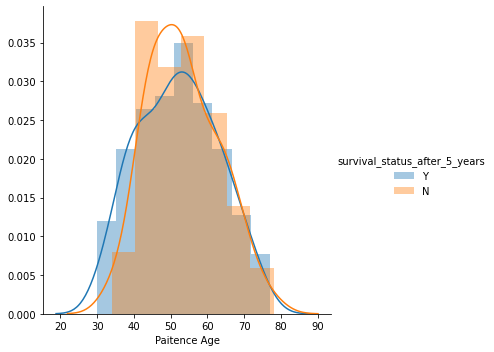

/Users/728389/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/728389/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


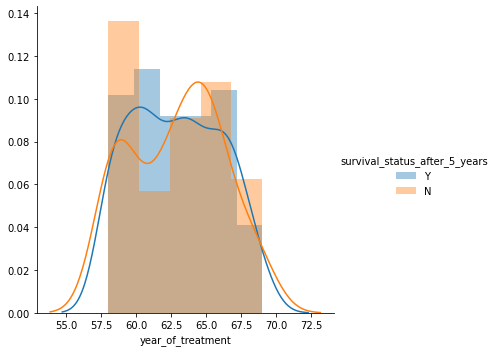

/Users/728389/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/728389/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


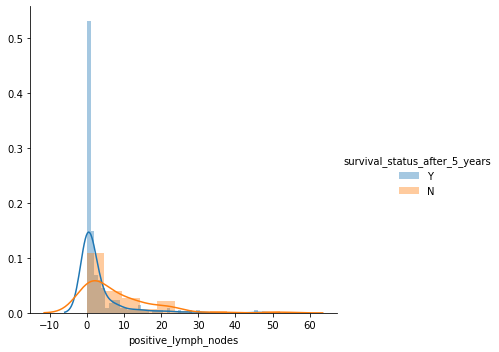

In [43]:
for idx, feature in enumerate(list(Hererman_df1.columns)[:-1]):
    fg = sns.FacetGrid(Hererman_df1, hue='survival_status_after_5_years', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

PDF and CDF

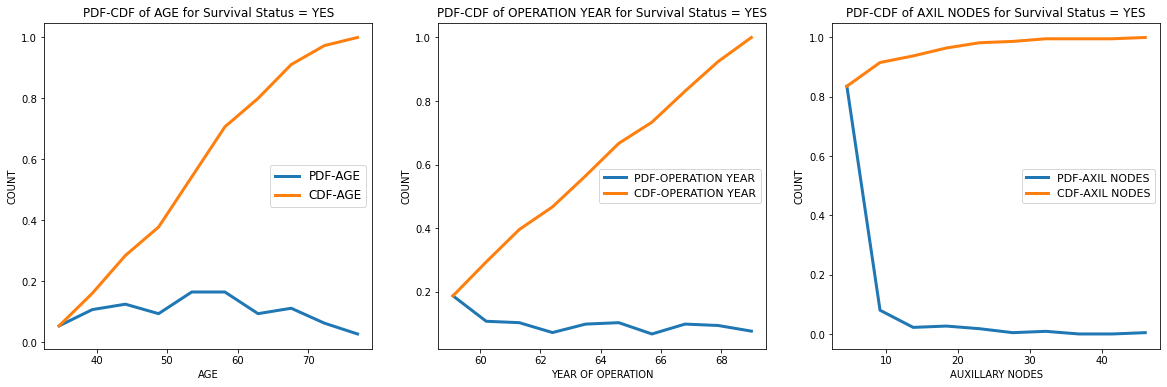

In [84]:
plt.figure(figsize=(20,6))
plt.subplot(131)
counts,bin_edges=np.histogram(status_yes["Paitence Age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('AGE')
plt.ylabel("COUNT")
plt.title('PDF-CDF of AGE for Survival Status = YES')
plt.legend(['PDF-AGE', 'CDF-AGE'], loc = 5,prop={'size': 12})

plt.subplot(132)
counts,bin_edges=np.histogram(status_yes["year_of_treatment"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('YEAR OF OPERATION')
plt.ylabel("COUNT")
plt.title('PDF-CDF of OPERATION YEAR for Survival Status = YES')
plt.legend(['PDF-OPERATION YEAR', 'CDF-OPERATION YEAR'], loc = 5,prop={'size': 11})

plt.subplot(133)
counts,bin_edges=np.histogram(status_yes["positive_lymph_nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,linewidth=3.0)
plt.plot(bin_edges[1:],cdf,linewidth=3.0)
plt.xlabel('AUXILLARY NODES')
plt.ylabel("COUNT")
plt.title('PDF-CDF of AXIL NODES for Survival Status = YES')
plt.legend(['PDF-AXIL NODES', 'CDF-AXIL NODES'], loc = 5,prop={'size': 11})
plt.show()



There are 80% patient whose AXIL NODES is less that 10

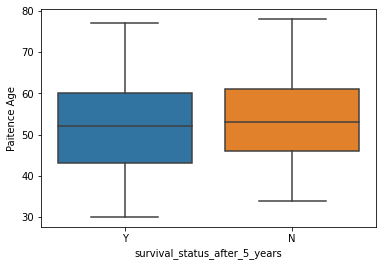

In [87]:
sns.boxplot(data=Hererman_df1,x='survival_status_after_5_years',y='Paitence Age')
plt.show()

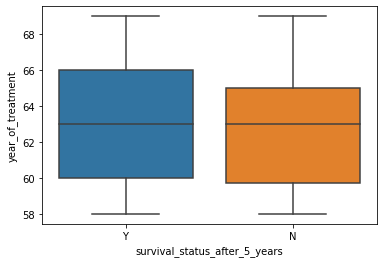

In [88]:
sns.boxplot(data=Hererman_df1,x='survival_status_after_5_years',y='year_of_treatment')
plt.show()

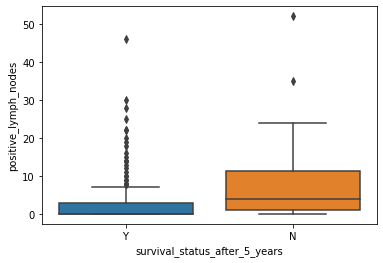

In [89]:
sns.boxplot(data=Hererman_df1,x='survival_status_after_5_years',y='positive_lymph_nodes')
plt.show()

Violin Plots

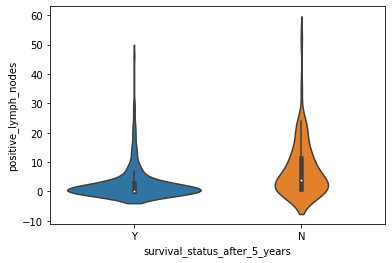

In [90]:
sns.violinplot(data=Hererman_df1,x='survival_status_after_5_years',y='positive_lymph_nodes')
plt.show()

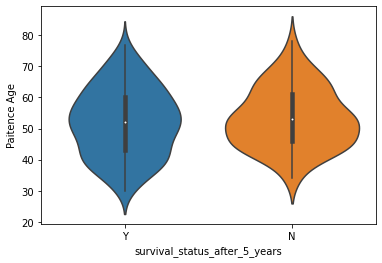

In [91]:
sns.violinplot(data=Hererman_df1,x='survival_status_after_5_years',y='Paitence Age')
plt.show()

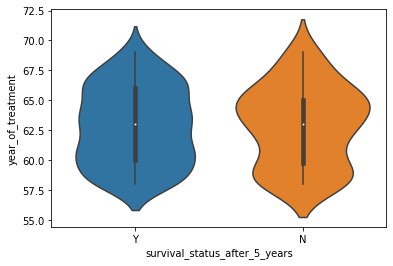

In [92]:
sns.violinplot(data=Hererman_df1,x='survival_status_after_5_years',y='year_of_treatment')
plt.show()

Bi-variate data analysis

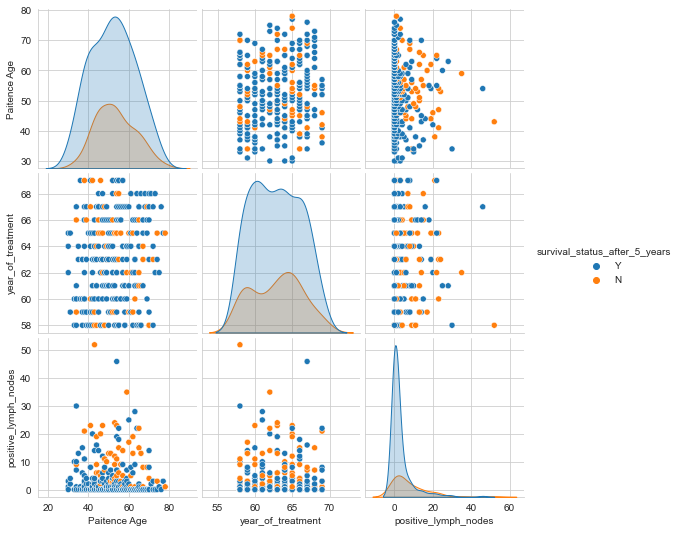

In [94]:
sns.set_style('whitegrid')
sns.pairplot(Hererman_df1, hue = 'survival_status_after_5_years')
plt.show()

There are no clear conclusions made by seeing pair plot , lets try a joint plot

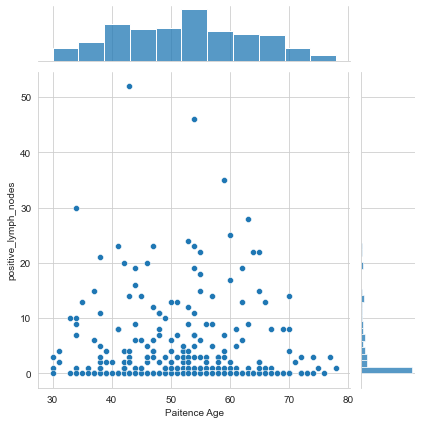

In [96]:
sns.jointplot(x = 'Paitence Age', y = 'positive_lymph_nodes', data = Hererman_df1)
plt.show()

In [97]:
Lets create a heatmap to find out the correlation

SyntaxError: invalid syntax (<ipython-input-97-0f0f86076074>, line 1)

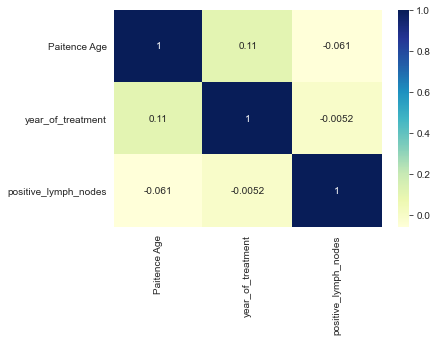

In [103]:
sns.heatmap(Hererman_df1.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [ ]:
Based on the heatmap , we concludate that there are not correlation exist in the variables.